In [34]:
#!pip install meteostat

#https://towardsdatascience.com/creating-a-dual-axis-combo-chart-in-python-52624b187834

# https://dev.meteostat.net/python/daily.html#example

baselines to compare the different snow per arrondissement:  
'tavg'  
'wspd'  
'prcp'  
'snow'  

In [41]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

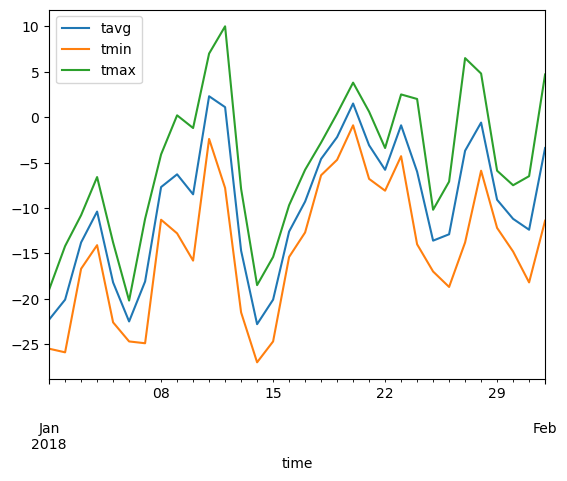

In [30]:
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 2, 1)

## Create Point for MONTREAL, QC
#montreal = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
# MONTREAL
MONTREAL_WMO_ID = 71627
data = Daily(MONTREAL_WMO_ID, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

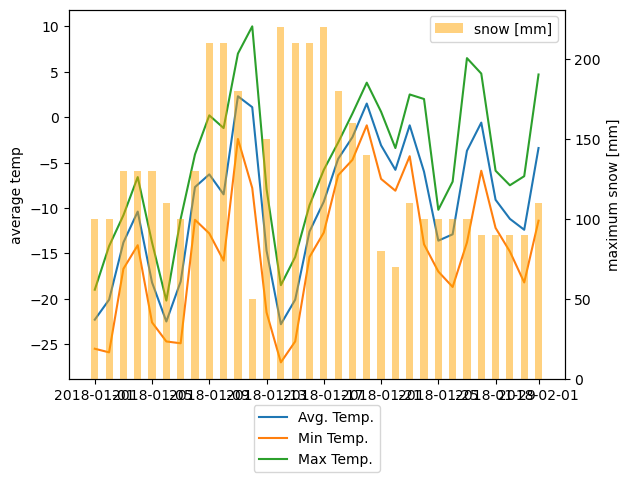

In [40]:
x = data.index
average_temp = data[['tavg', 'tmin', 'tmax']]

# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(x, average_temp) 
ax1.set_ylabel('average temp')
#ax1.set_ylim(0, 35)
ax1.legend(['Avg. Temp.', 'Min Temp.', 'Max Temp.'],
            #loc="upper left"
            bbox_to_anchor =(0.5,-0.27), loc='lower center'
            )

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(x, data['snow'], width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('maximum snow [mm]')
#ax2.set_ylim(0, 1000)
ax2.legend(['snow [mm]'], loc="best")
plt.show()

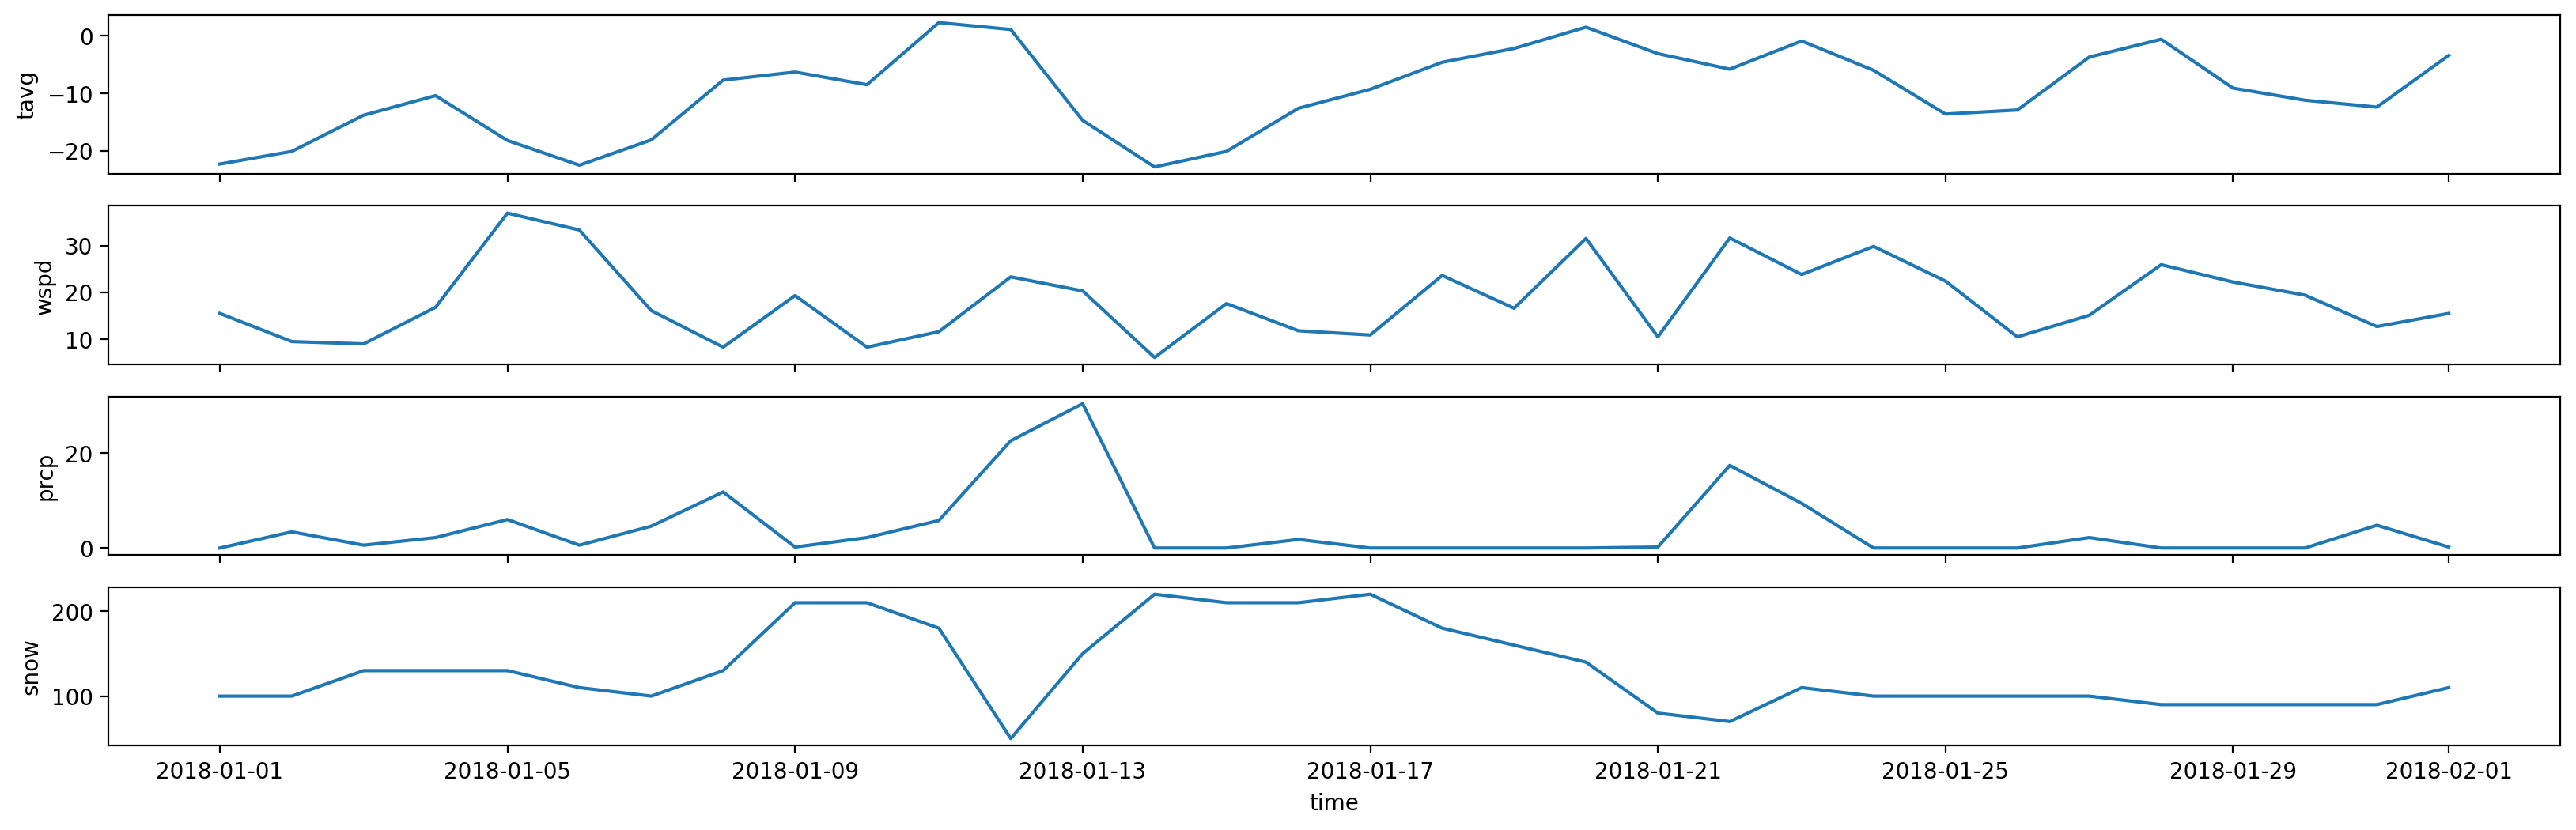

In [47]:
%matplotlib inline
figure_size =[20,6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# wspd , prcp, snow
dd = data[['tavg', 'wspd' , 'prcp', 'snow']]

fig, axs = plt.subplots(nrows=4, figsize=figure_size, sharex=True)

# Plot the responses for different events and regions
g = sns.lineplot(x=dd.index, y=dd['tavg'], estimator='max',
             data=dd, palette='Set2', ax=axs[0])

g = sns.lineplot(x=dd.index, y=dd['wspd'], estimator='max',
             data=dd, palette='Set2', ax=axs[1])

g = sns.lineplot(x=dd.index, y=dd['prcp'], estimator='max',
             data=dd, palette='Set2', ax=axs[2])

g = sns.lineplot(x=dd.index, y=dd['snow'], estimator='max',
             data=dd, palette='Set2', ax=axs[3])
